<a href="https://colab.research.google.com/github/YanaStekolshchikova/StatPrak25/blob/main/Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Загрузка и предварительный анализ(EDA)**

### 1.1 Загрузка, удаление лишних данных, анализ пропусков

In [ ]:
#ссылка на датасет
#https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

In [36]:
#импорт библиотек, загрузка данных
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from itertools import cycle
import warnings


pd.set_option('display.max_columns', None) #чтобы head показывала все столбцы
data = pd.read_csv('/content/Billionaires Statistics Dataset.csv', low_memory = False)
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [37]:
#анализ пропусков
missing_data = data.isnull().sum().to_frame(name='Пропущенные значения')
missing_data['% от общего'] = (missing_data['Пропущенные значения'] / len(data)) * 100
display(missing_data)

,Пропущенные значения,% от общего
rank,0,0.000000
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
age,65,2.462121
country,38,1.439394
city,72,2.727273
source,0,0.000000
industries,0,0.000000
countryOfCitizenship,0,0.000000


In [38]:
#  удалим признаков с большим количеством пропуском и заполним небольшие пропуски
columns_drop = ['organization', 'title', 'state', 'residenceStateRegion']
data = data.drop(columns = columns_drop, errors = 'ignore')
data = data.dropna(subset=['birthYear']) #удалили строки с пропуском года рождения

 # функция для удаления всех символы, кроме цифр, точек и минусов
def clean_numeric_column(column):
    return column.astype(str).str.replace(r'[^0-9.\-]', '', regex=True)

# для числовых столбцов заполняем медианой
numeric_cols = ['age', 'birthYear', 'birthMonth', 'birthDay',
                'cpi_country', 'cpi_change_country', 'gdp_country',
                'gross_tertiary_education_enrollment',
                'gross_primary_education_enrollment_country',
                'life_expectancy_country', 'tax_revenue_country_country',
                'total_tax_rate_country', 'population_country',
                'latitude_country', 'longitude_country']
# сначала очищаем и преобразуем колонки в числовой тип
for col in numeric_cols:
        data[col] = clean_numeric_column(data[col])
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(data[col].median())

# для категориальных столбцов заполняем модой
categorical_cols = ['country', 'city', 'birthDate', 'firstName']

for col in categorical_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

### 1.2 Исследование распределений ключевых признаков

#### 1.2.1 Aнализ распределения состояний

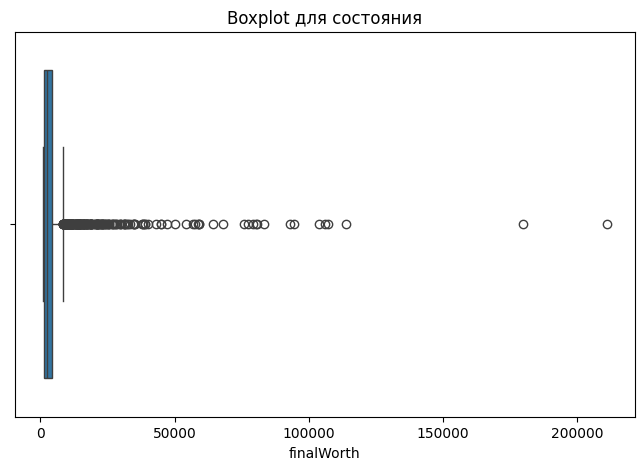

In [5]:
#распределение состояния
plt.figure(figsize=(8,5))
sns.boxplot(x=data['finalWorth'])
plt.title('Boxplot для состояния')
plt.show()

#### 1.2.2 Корреляционная матрица признаков

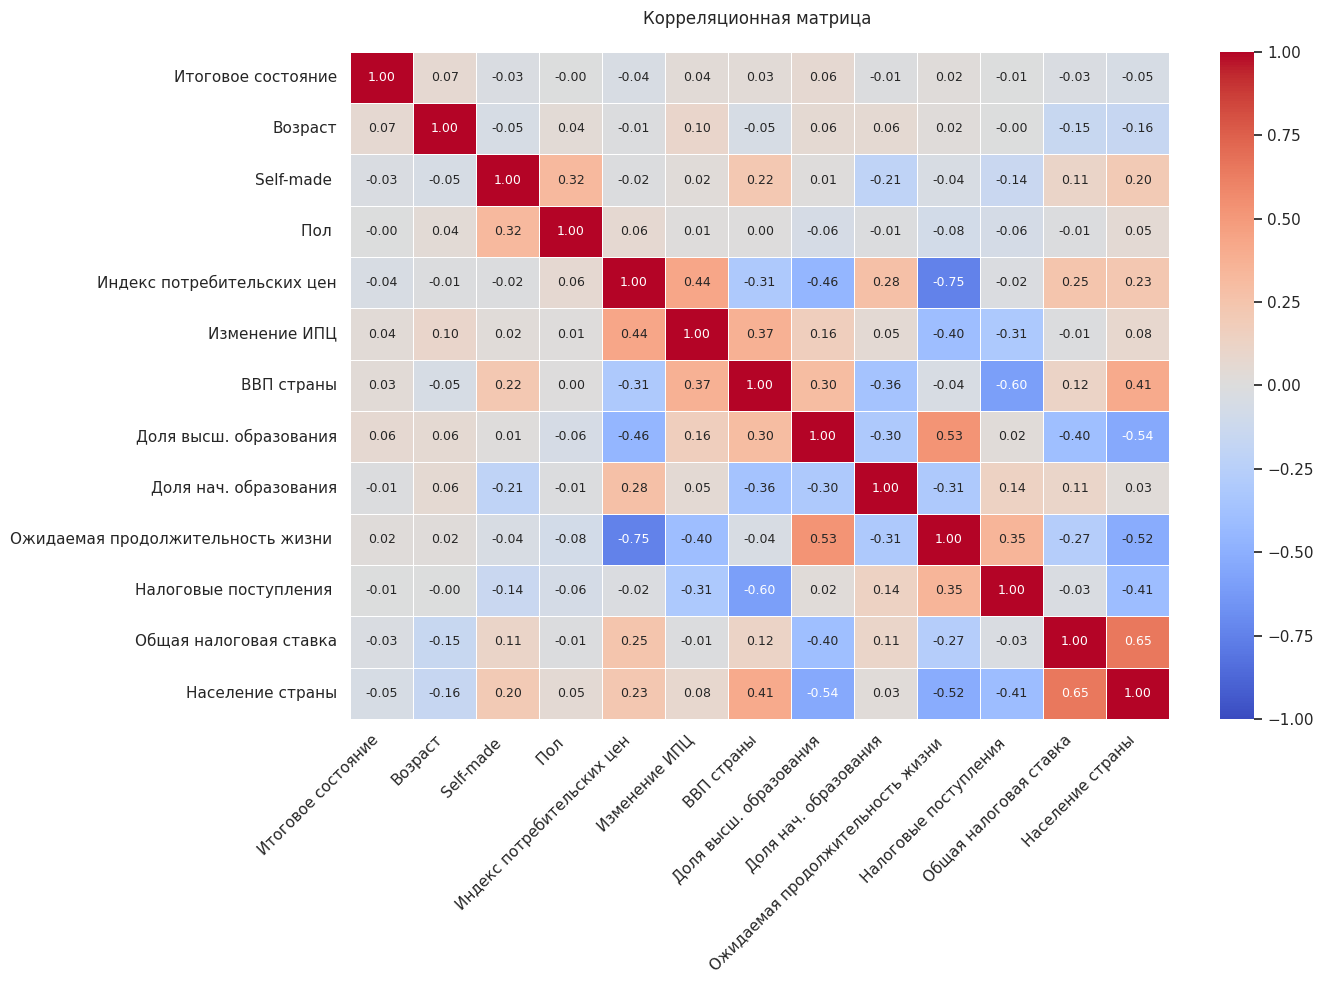

In [39]:
data_corr = data.copy()
# Кодируем категориальные признаки
gender_map = {'M': 1, 'F': 0}
data_corr['gender_encoded'] = data_corr['gender'].map(gender_map)
data_corr['selfMade_encoded'] = data_corr['selfMade'].astype(int)

features_for_corr = [
    'finalWorth', 'age', 'selfMade_encoded', 'gender_encoded', 'cpi_country',
    'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment',
    'gross_primary_education_enrollment_country', 'life_expectancy_country',
    'tax_revenue_country_country', 'total_tax_rate_country', 'population_country'
]

if data_corr['gdp_country'].dtype == object:
    data_corr['gdp_country'] = data_corr['gdp_country'].replace('[\$,]', '', regex=True).astype(float)

corr_matrix = data_corr[features_for_corr].corr()

labels_readable = {
    'finalWorth': 'Итоговое состояние', 'age': 'Возраст', 'selfMade_encoded': 'Self-made ',
    'gender_encoded': 'Пол ', 'cpi_country': 'Индекс потребительских цен', 'cpi_change_country': 'Изменение ИПЦ',
    'gdp_country': 'ВВП страны', 'gross_tertiary_education_enrollment': 'Доля высш. образования', 'gross_primary_education_enrollment_country': 'Доля нач. образования',
    'life_expectancy_country': 'Ожидаемая продолжительность жизни ', 'tax_revenue_country_country': 'Налоговые поступления ',
    'total_tax_rate_country': 'Общая налоговая ставка', 'population_country': 'Население страны'
}

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
    vmin=-1, vmax=1, linewidths=0.5, annot_kws={'size': 9},
    xticklabels=[labels_readable.get(col, col) for col in corr_matrix.columns],
    yticklabels=[labels_readable.get(row, row) for row in corr_matrix.index]
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Корреляционная матрица ', pad=20)
plt.tight_layout()
plt.show()


#### 1.2.3 Aнализ возраста миллиардеров

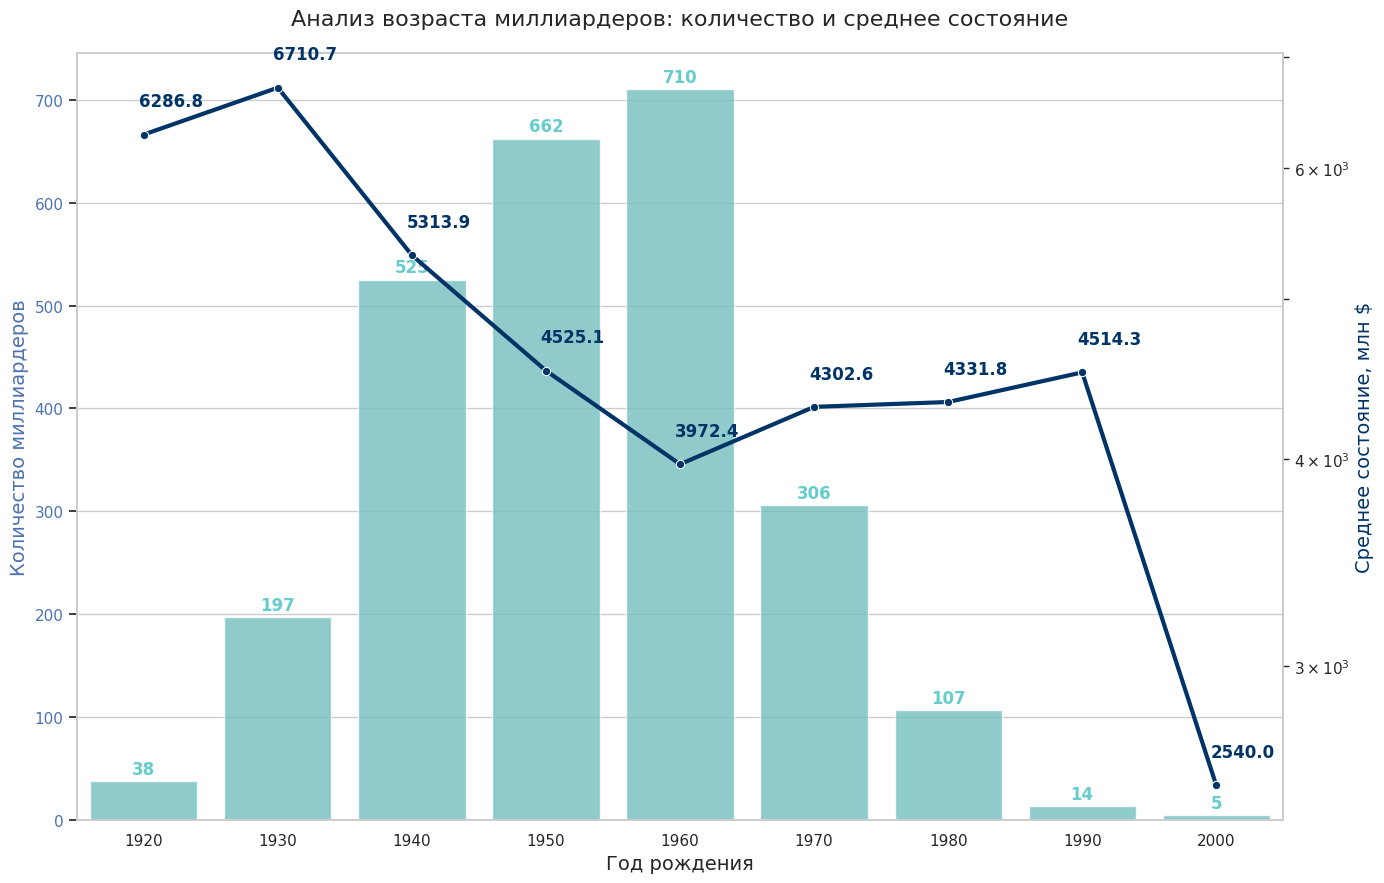

In [30]:
#анализ возраста миллиардеров: количество и среднее состояние
data['birthYear'] = data['birthYear'].astype(int)

#создадем интервалы по 10 лет
bins = list(range(data['birthYear'].min()//10*10, (data['birthYear'].max()//10+2)*10, 10))
labels = [f"{b}" for b in bins[:-1]]
data['birthCohort'] = pd.cut(data['birthYear'], bins=bins, labels=labels, right=False)

#группируем по интервалам и подсчитаем количество миллиардеров и среднее состояние
grouped = data.groupby('birthCohort', observed=True).agg(
    count=('personName', 'count'),
    mean_wealth=('finalWorth', 'mean'),
    median_wealth=('finalWorth', 'median')
).reset_index()

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(14,9))

#создаем вторую ось Y для среднего состояния
ax2 = ax1.twinx()
sns.lineplot(data=grouped, x='birthCohort', y='mean_wealth', ax=ax2, color='#003366', marker='o', linewidth=3)
ax2.set_ylabel('Среднее состояние, млн $', color='#003366', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#003366')
ax2.set_yscale('log')

#барграф для количества
sns.barplot(data=grouped, x='birthCohort', y='count', ax=ax1, color= '#66CCCC', alpha=0.8)
ax1.set_ylabel('Количество миллиардеров', color='b', fontsize=14)
ax1.set_xlabel('Год рождения', fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Анализ возраста миллиардеров: количество и среднее состояние', fontsize=16, pad=20)

#подписи значений - количество миллиардеров
for i, v in enumerate(grouped['count']):
    ax1.text(i, v + max(grouped['count'])*0.01, str(v), ha='center', color='#66CCCC', fontsize=12, fontweight='bold')
#подписи значений - среднего состояния
for i, v in enumerate(grouped['mean_wealth']):
    ax2.text(i+0.2, v*1.04, f"{v:.1f}", ha='center', color='#003366', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1.2.4 Aнализ соотношения миллиардеров по полу


  gender  count         mean  median           std
0      F    304  4763.815789  2500.0   7939.915033
1      M   2260  4678.982301  2400.0  10205.117927


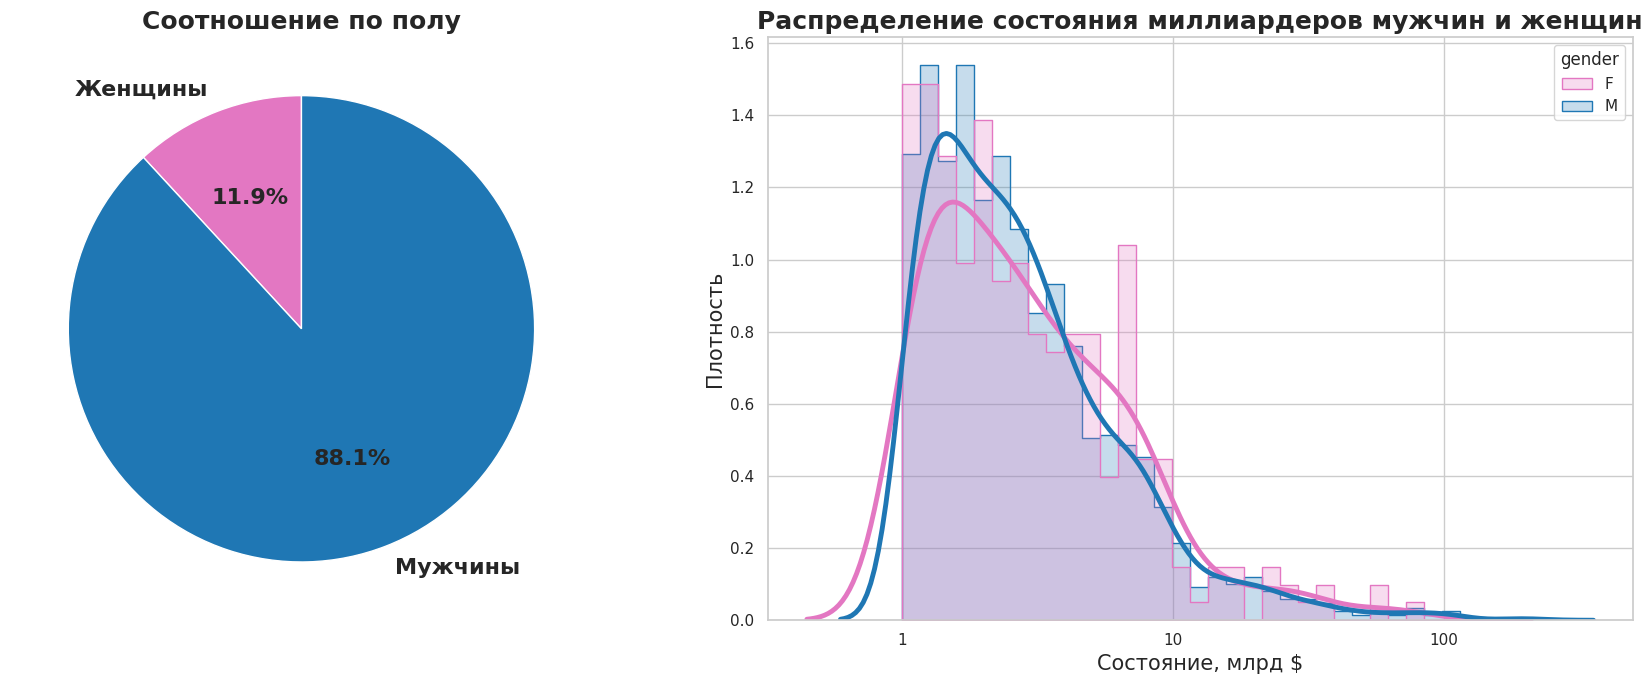

In [11]:
# статистические показатели для каждого пола
summary = data.groupby('gender')['finalWorth'].agg(['count', 'mean', 'median', 'std']).reset_index()
print(summary)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# диаграмма долей мужчин и женщин
gender_counts = data['gender'].value_counts(normalize=True)
gender_counts = gender_counts.reindex(['F', 'M'])
colors = ['#e377c2', '#1f77b4']
labels = ['Женщины', 'Мужчины']

ax1.pie(gender_counts.values * 100, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=colors, textprops={'fontsize': 16, 'weight': 'bold'}
)
ax1.set_title('Соотношение по полу', fontsize=18, weight='bold')

palette = {'F': '#e377c2', 'M': '#1f77b4'}

# гистограмма
sns.histplot(data=data, x='finalWorth', hue='gender', hue_order=['F', 'M'], element='step', stat='density',
    common_norm=False, kde=False, palette=palette, ax=ax2,log_scale=True, linewidth=1
)

#  KDE
for gender, color in zip(['F', 'M'], ['#e377c2', '#1f77b4']):
    sns.kdeplot(data=data[data['gender'] == gender], x='finalWorth',
        color=color, ax=ax2,log_scale=True, linewidth=3.5
  )

ax2.set_title('Распределение состояния миллиардеров мужчин и женщин', fontsize=18, weight='bold')
ax2.set_xlabel('Состояние, млрд $', fontsize=15)
ax2.set_ylabel('Плотность', fontsize=15)

def millions_formatter(x, pos):
        return f'{x*1e-3:.0f}'

ax2.xaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))
ax2.tick_params(axis='x')

plt.tight_layout()
plt.show()

#### 1.2.5 Aнализ распределения миллиардеров по странам

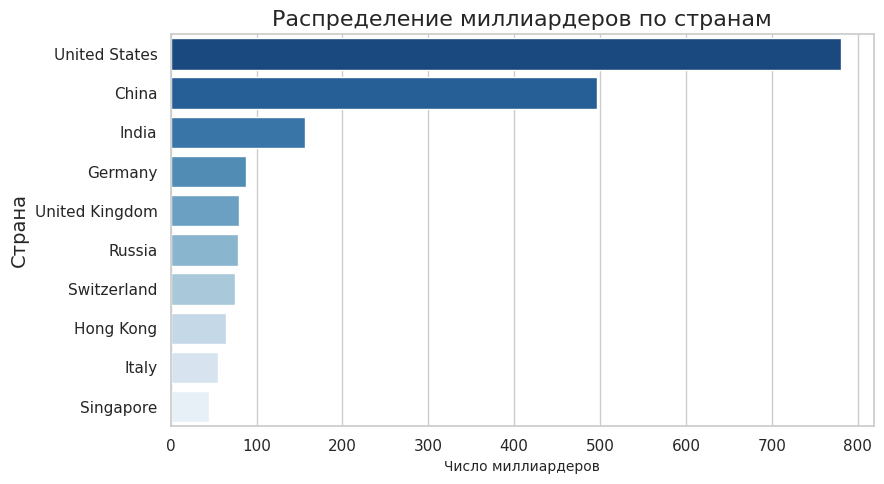

In [12]:
#распределение миллиардеров по странам
#P.S. карта не отображается на гитхабе, есть в презентации и в ноутбуке
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'num_billionaires']

# диаграмма
plt.figure(figsize=(9,5))
sns.barplot(data=country_counts.head(10), y='country', x='num_billionaires',
            palette="Blues_r", hue='country', legend=False)
plt.title('Распределение миллиардеров по странам', fontsize=16)
plt.xlabel('Число миллиардеров', fontsize=10)
plt.ylabel('Страна', fontsize=14)
plt.tight_layout()
plt.show()

# страны на карте
color = ['#b4d3ec', '#89bae0', '#5ea2d6', '#2a7dc5', '#12406a']
fig = px.choropleth(country_counts, locations='country',locationmode='country names',
                   color='num_billionaires', color_continuous_scale=color, width=900, height=500)

fig.update_layout(coloraxis_colorbar=dict(title='Количество<br>миллиардеров'))
fig.show()

#### 1.2.6 Aнализ распределения миллиардеров по отраслям

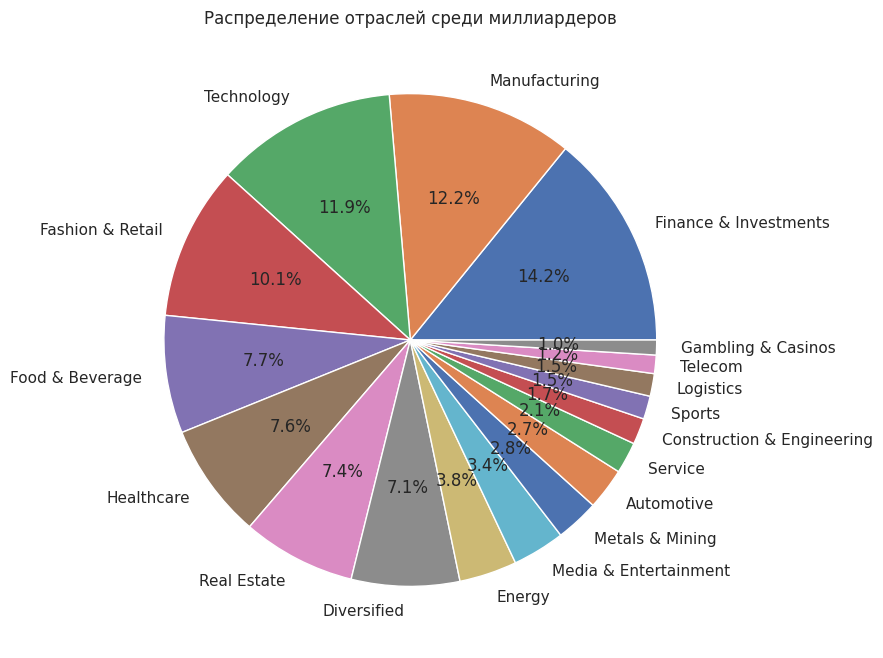

In [40]:
billionaires = data['industries'].value_counts()

plt.figure(figsize=(8, 8))
billionaires.plot.pie(autopct='%1.1f%%')
plt.title('Распределение отраслей среди миллиардеров')
plt.ylabel('')
plt.show()

## **2. Проверка гипотез**

### 2.1 В среднем состояние IT-миллиардеров больше, чем состояние миллиардеров из других областей

M(IT) — среднее состояние IT-миллиардеров в генеральной совокупности,

M(Other) — среднее состояние миллиардеров из других отраслей в генеральной совокупности.

**Нулевая гипотеза (H0):**

H0: M(IT) <= M(Other)

*«Среднее состояние IT-миллиардеров не превышает среднее состояние миллиардеров из других отраслей».*

**Альтернативная гипотеза (H1):**

H1: M(IT) > M(Other)

*«Среднее состояние IT-миллиардеров больше среднего состояния миллиардеров из других отраслей».*

Когда классические статистические методы(например, t-тест) неприменимы из-за нарушения предположений о нормальности распределения или наличии выбросов, на помощь приходит bootstrap.


Бутстреп- это метод, который заключается в многократном создании псевдовыборок из исходных данных с заменой. Каждая такая выборка имеет тот же размер, что и оригинальные данные, но некоторые наблюдения могут повторяться, а другие- отсутствовать. На основе тысяч итераций строится эмпирическое распределение интересующей статистики(например, разницы средних). Это позволяет:

*   оценить точность параметра
*   построить доверительные интервалы
*   проверить статистическую значимость

Плюсы:

* Устойчивость к ненормальности: Не требует предположения о нормальном распределении данных.

* Работа с малыми выборками: Даёт надежные результаты даже при небольшом количестве наблюдений.

* Учёт выбросов: Менее чувствителен к аномальным значениям, чем параметрические методы.

* Гибкость: Может быть применён к любым статистикам (медианы, дисперсии, корреляции).


В данном исследовании бутстреп используется для сравнения среднего состояния IT-миллиардеров и миллиардеров из других отраслей.

Шаги метода:

* Из исходных данных формируются две группы: IT и не-IT.

* Генерируется 10,000 псевдовыборок для каждой группы.

* Для каждой итерации вычисляется разница между средними значениями групп.

* На основе распределения этих разниц определяется:
    1.   Средняя разница (mean_diff)
    2.   95% доверительный интервал
    3.   p-value для проверки гипотезы.

Этот подход позволяет сделать выводы о значимости различий, даже если исходные данные имеют сложное распределение или содержат выбросы.

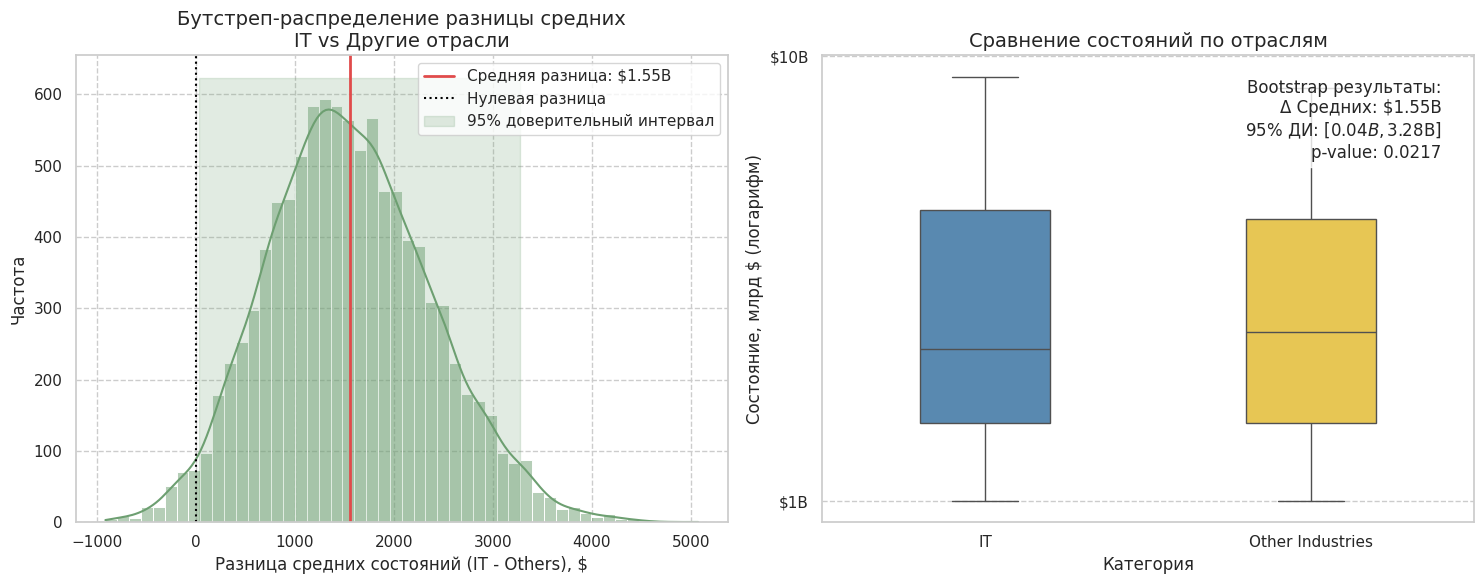


Вывод: Отвергаем H0. IT-миллиардеры богаче (p < 0.05).


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

#Отделяем IT-миллиардеров
it_mask = data['category'].str.contains('Technology', case=False, na=False)
data['is_IT'] = np.where(it_mask, 'IT', 'Other Industries')

it_wealth = data[data['is_IT'] == 'IT']['finalWorth']
other_wealth = data[data['is_IT'] == 'Other Industries']['finalWorth']

#Bootstrap анализ
def bootstrap_means_diff(group1, group2, n_iterations=10000):
    """Бутстреп-оценка разницы средних"""
    diffs = []
    combined_mean = np.mean(np.concatenate([group1, group2]))

    for _ in range(n_iterations):
        # Генерация псевдовыборок с повторением
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        diffs.append(np.mean(sample1) - np.mean(sample2))  # IT - Others

    return diffs

bootstrap_diffs = bootstrap_means_diff(it_wealth, other_wealth)

#Расчет показателей
mean_diff = np.mean(bootstrap_diffs)
ci_low, ci_high = np.percentile(bootstrap_diffs, [2.5, 97.5])
p_value = (np.array(bootstrap_diffs) <= 0).mean()

#Визуализация
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})
palette = {'IT': '#4B8BBE', 'Other Industries': '#FFD43B'}

# График 1: Распределение разниц
plt.subplot(1, 2, 1)
ax1 = sns.histplot(bootstrap_diffs, bins=50, kde=True, color='#6D9F71')
plt.axvline(mean_diff, color='#E04B4B', lw=2, label=f'Средняя разница: ${mean_diff/1000:.2f}B')
plt.axvline(0, color='black', linestyle=':', label='Нулевая разница')
plt.fill_betweenx([0, ax1.get_ylim()[1]], ci_low, ci_high, color='#6D9F71', alpha=0.2,
                 label='95% доверительный интервал')
plt.title('Бутстреп-распределение разницы средних\nIT vs Другие отрасли', fontsize=14)
plt.xlabel('Разница средних состояний (IT - Others), $', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()

# График 2: Сравнение групп
plt.subplot(1, 2, 2)
order = ['IT', 'Other Industries']

#Boxplot
ax2 = sns.boxplot(x='is_IT', y='finalWorth', hue='is_IT', data=data, palette=palette, width=0.4, showfliers=False, order=order, legend=False)

# Добавление аннотаций
stats_text = (f"Bootstrap результаты:\n"
              f"Δ Средних: ${mean_diff/1000:.2f}B\n"
              f"95% ДИ: [${ci_low/1000:.2f}B, ${ci_high/1000:.2f}B]\n"
              f"p-value: {p_value:.4f}")
ax2.text(0.95, 0.95, stats_text, transform=ax2.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))

# Настройка осей
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(lambda x, _: f'${x/1000:.0f}B')
plt.title('Сравнение состояний по отраслям', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Состояние, млрд $ (логарифм)', fontsize=12)

plt.tight_layout()
plt.show()

#результат
if p_value < 0.05:
    print("\nВывод: Отвергаем H0. IT-миллиардеры богаче (p < 0.05).")
else:
    print("\nВывод: Нет оснований отвергать H0. Значимых различий не обнаружено (p ≥ 0.05).")

### 2.2 Большинство русских сверхбогатых людей заработали состояние в металлургической промышленности

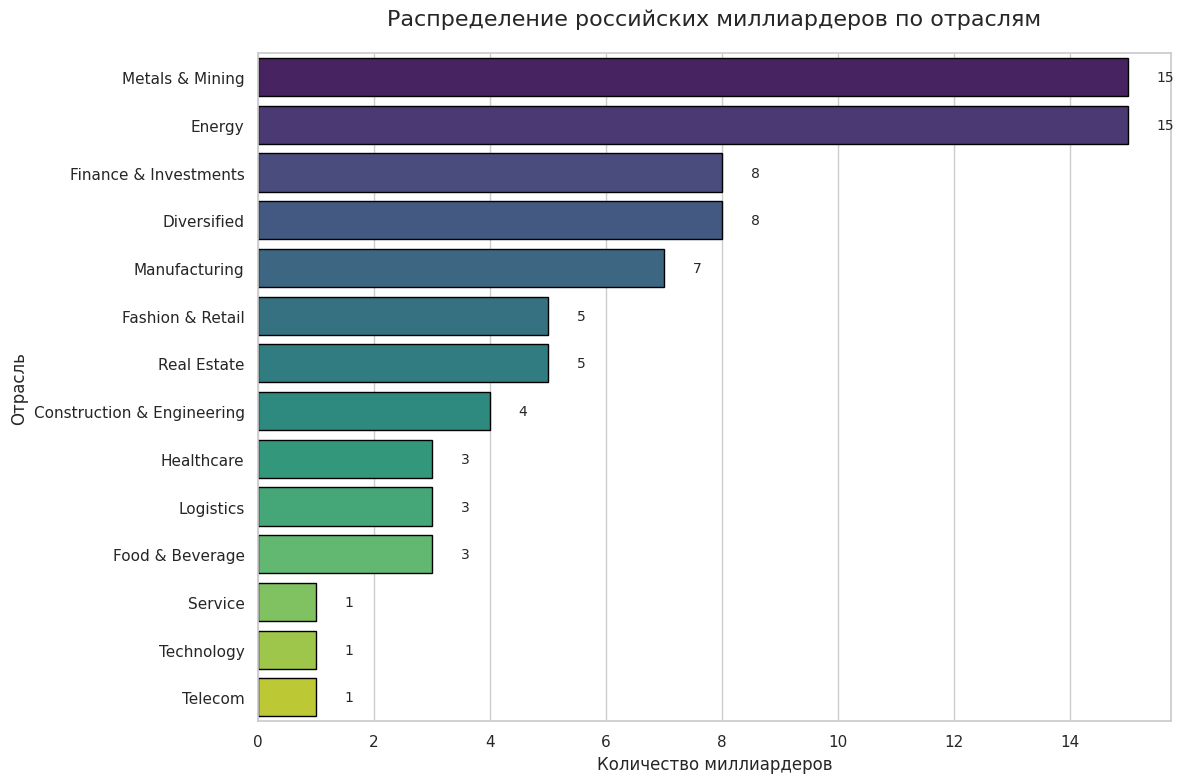

In [33]:
#Отфильтруем русских миллиардеров
russian_billionaires = data[data['country'] == 'Russia']

#Сгруппируем по отраслям и посчитаем количество миллиардеров
industry_counts = russian_billionaires['category'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']
industry_counts = industry_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=industry_counts, x='Count', y='Industry', hue='Industry', palette='viridis',
                 edgecolor='black', linewidth=1, legend=False)

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

plt.title('Распределение российских миллиардеров по отраслям', fontsize=16, pad=20)
plt.xlabel('Количество миллиардеров', fontsize=12)
plt.ylabel('Отрасль', fontsize=12)

plt.tight_layout()
plt.show()

### 2.3 Средний возраст self-made миллиардеров в IT ниже, чем средний возраст self-made миллиардеров в традиционных отраслях

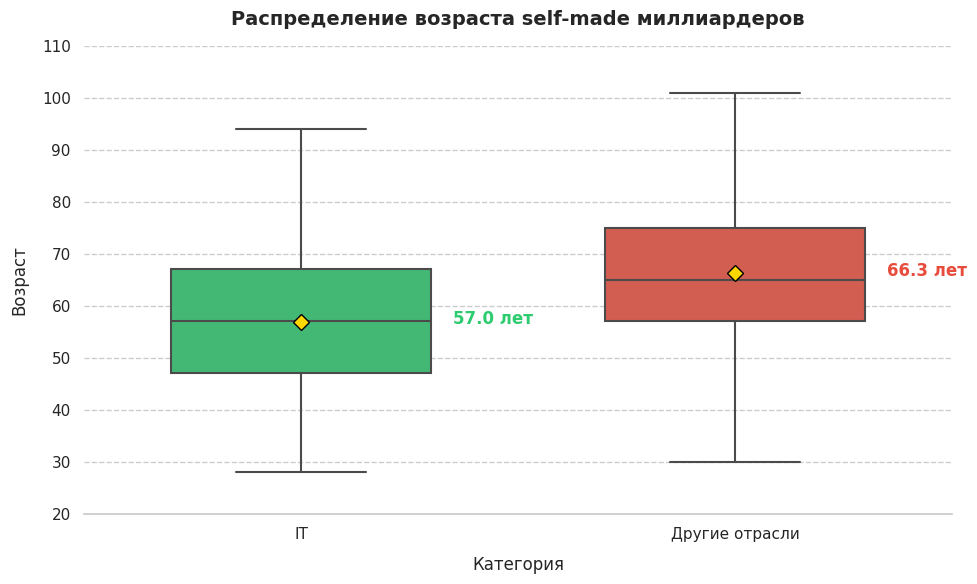

In [34]:
self_made = data[data['selfMade'] == True]
it_mask = self_made['category'].str.contains('Technology', case=False, na=False)
combined_data = pd.concat([
    self_made[it_mask].assign(Category='IT'),
    self_made[~it_mask].assign(Category='Другие отрасли')
])

# Считаем средний возраст
avg_ages = combined_data.groupby('Category')['age'].mean().round(1)

# График
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})
palette = {'IT': '#2ecc71', 'Другие отрасли': '#e74c3c'}

ax = sns.boxplot(x='Category', y='age', hue='Category', data=combined_data, palette=palette, width=0.6, linewidth=1.5,
    showmeans=True, meanprops={'marker':'D', 'markerfacecolor':'gold', 'markeredgecolor':'black', 'markersize':8}, legend=False)

for i, category in enumerate(avg_ages.index):
    ax.text(i + 0.35, avg_ages[category] + 0.5, f'{avg_ages[category]} лет', fontsize=12,
        color=palette[category], weight='bold', va='center')

plt.title('Распределение возраста self-made миллиардеров', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Категория', fontsize=12, labelpad=10)
plt.ylabel('Возраст', fontsize=12, labelpad=10)
plt.ylim(20, 110)
sns.despine(left=True)

plt.tight_layout()
plt.show()

## **3. Классификация + прогнозирование**

### 3.1 Классификация отрасли - Random Forest + kNN

Лучшие параметры Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Лучшие параметры KNN: {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}


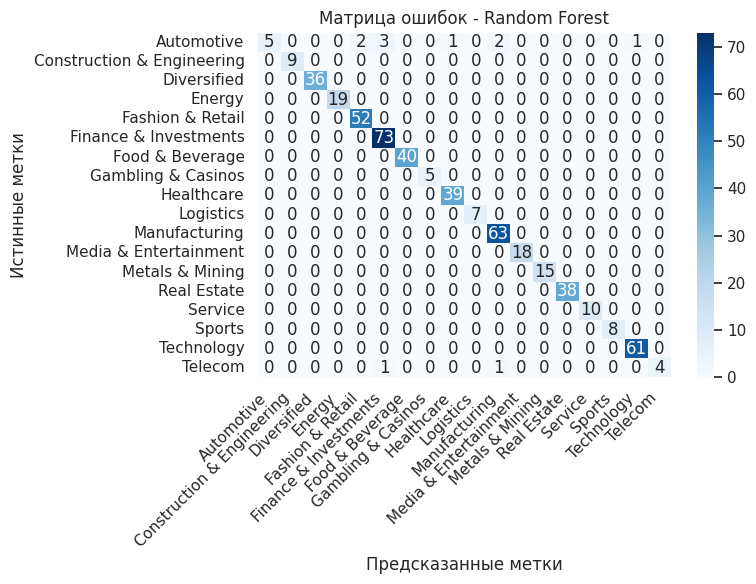

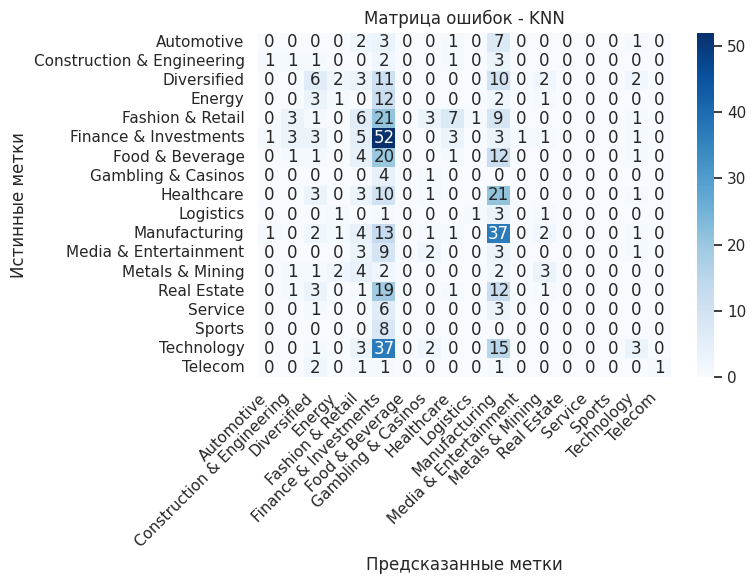

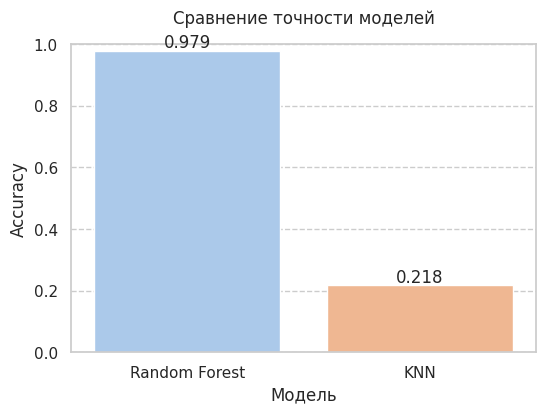

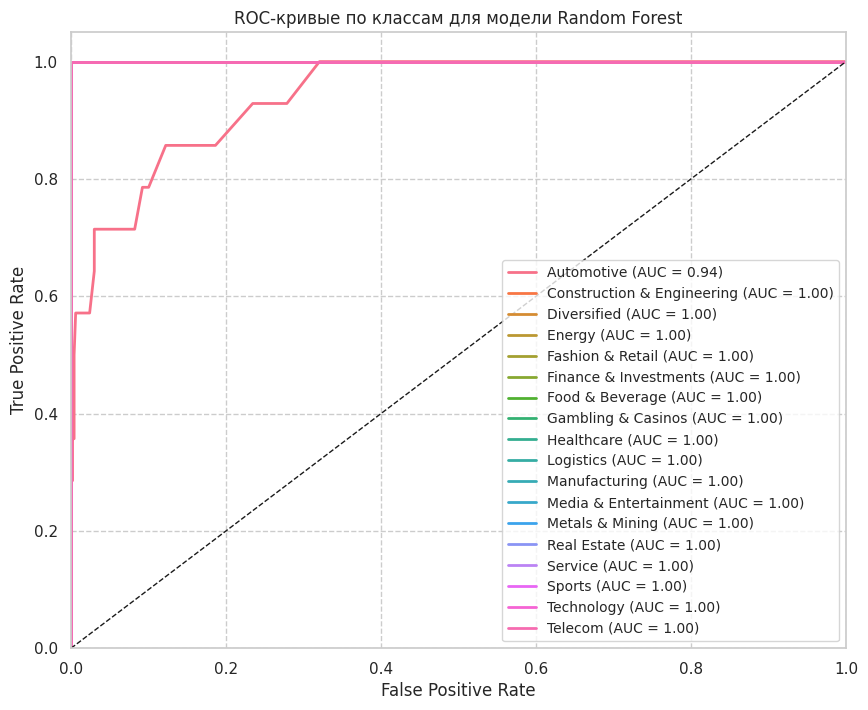

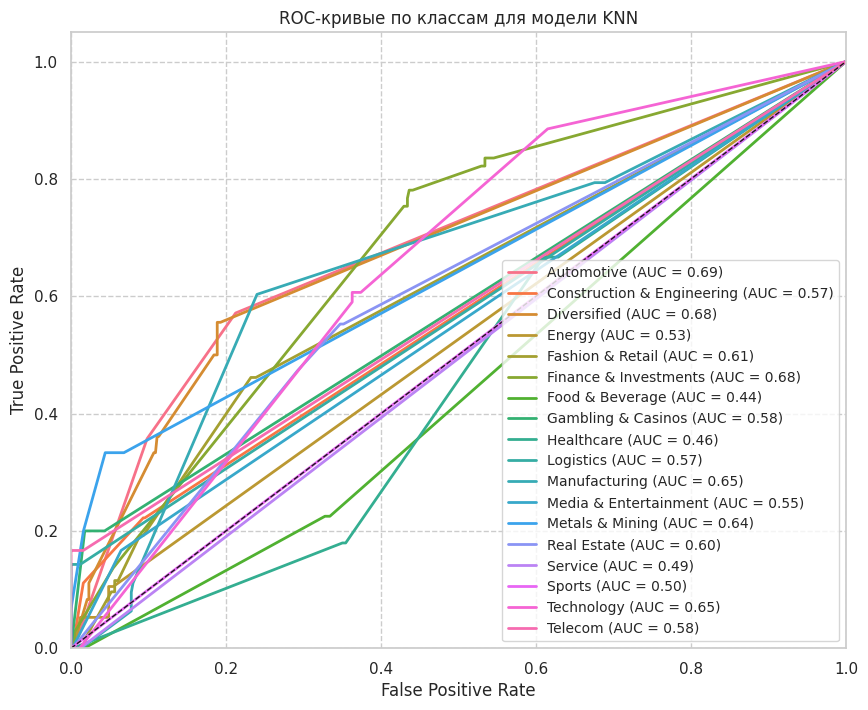

In [47]:
warnings.filterwarnings("ignore", category=UserWarning)

# Кодируем целевую переменную
y = data['category']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
classes = label_encoder.classes_
n_classes = len(classes)

X = data.drop(columns='category', errors='ignore')

# One-hot кодирование категориальных признаков
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Обучение Random Forest с подбором параметров
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print("Лучшие параметры Random Forest:", rf_grid_search.best_params_)

# Обучение KNN с масштабированием и подбором параметров
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance']
}
knn_grid_search = GridSearchCV(knn_pipe, knn_param_grid, cv=3, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
print("Лучшие параметры KNN:", knn_grid_search.best_params_)

# Функция для построения ROC-кривых по классам
def plot_roc_curves_separately(models, X_test, y_test, classes, n_classes):
    y_test_binarized = label_binarize(y_test, classes=range(n_classes))
    for model_name, model in models.items():
        y_score = model.predict_proba(X_test)
        colors = cycle(sns.color_palette("husl", n_classes))
        plt.figure(figsize=(10, 8))
        for i, color in zip(range(n_classes), colors):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2,
                     label=f'{classes[i]} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC-кривые по классам для модели {model_name}')
        plt.legend(loc='lower right', fontsize='small')
        plt.grid(True)
        plt.show()

# Функция для построения тепловых карт матрицы ошибок
def plot_confusion_matrices(models, X_test, y_test, classes):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Предсказанные метки')
        plt.ylabel('Истинные метки')
        plt.title(f'Матрица ошибок - {name}')
        plt.tight_layout()
        plt.show()

# Функция для сравнения точности моделей
def plot_accuracy_comparison(models, X_test, y_test):
    accuracies = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies[name] = acc
    plt.figure(figsize=(6,4))
    df_acc = pd.DataFrame({
        'Модель': list(accuracies.keys()),
        'Точность': list(accuracies.values())
    })

    sns.barplot(data=df_acc, x='Модель', y='Точность', hue='Модель', palette='pastel', dodge=False, legend=False)
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Сравнение точности моделей', pad=15)
    for i, val in enumerate(df_acc['Точность']):
        plt.text(i, val + 0.01, f"{val:.3f}", ha='center', fontsize=12)
    plt.legend([],[], frameon=False)
    plt.show()
    models = {'Random Forest': rf_grid_search, 'KNN': knn_grid_search}

plot_confusion_matrices(models, X_test, y_test, classes)
plot_accuracy_comparison(models, X_test, y_test)
plot_roc_curves_separately(models, X_test, y_test, classes, n_classes)

### 3.2 Предсказания состояния

Linear Regression:
 R2 = -0.045
 RMSE = 5204
 MAE = 3350 

Random Forest with GridSearchCV:
 R2 = -0.107
 RMSE = 5356
 MAE = 3341 

Лучшие параметры RandomForest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


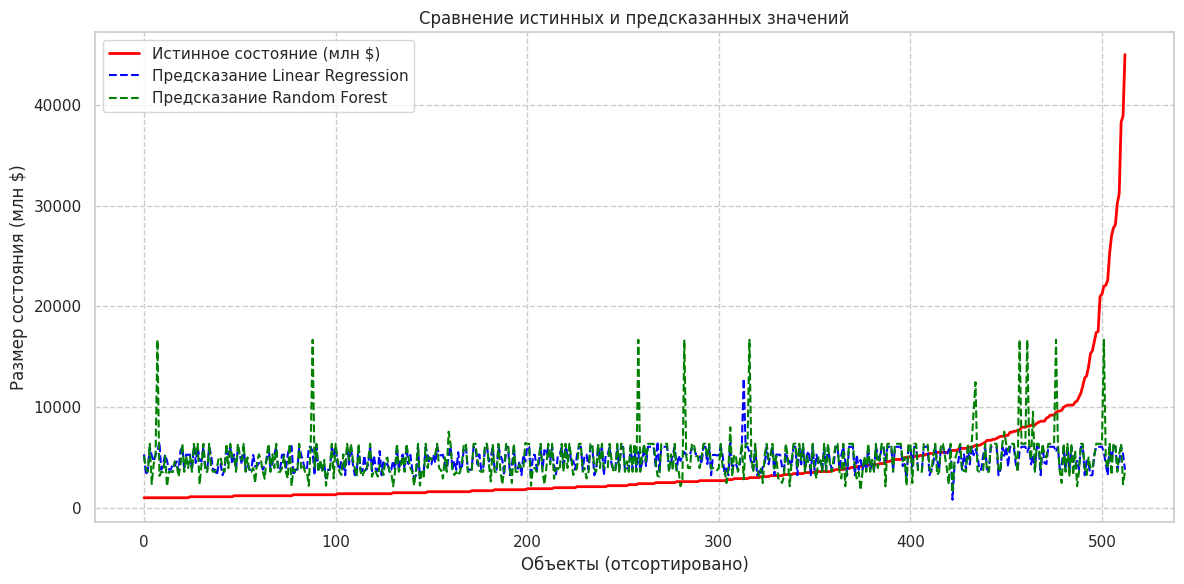

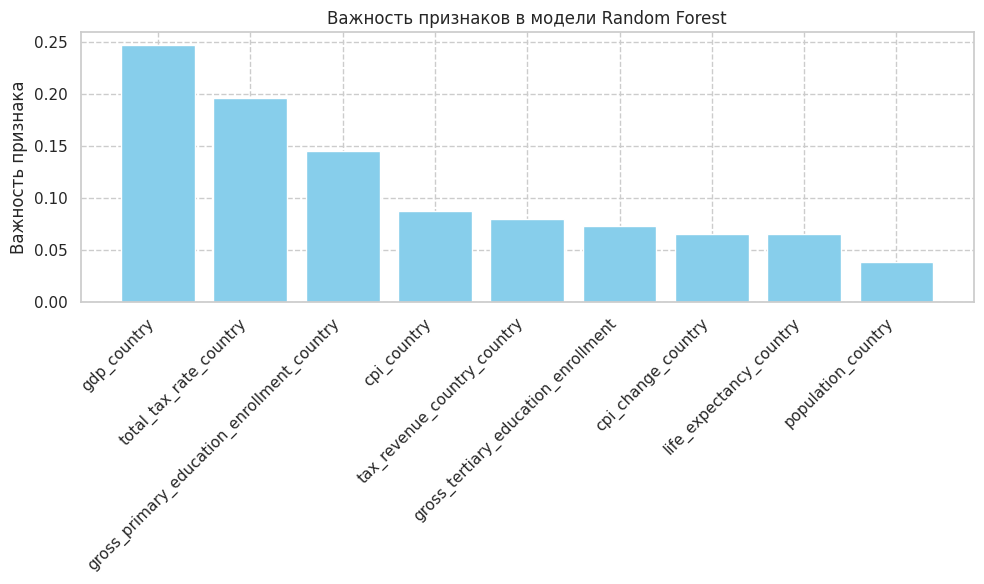

In [46]:
from sklearn.model_selection import GridSearchCV

def parse_gdp(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

data['gdp_country'] = data['gdp_country'].apply(parse_gdp)

features = [
    'cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment',
    'gross_primary_education_enrollment_country', 'life_expectancy_country',
    'tax_revenue_country_country','total_tax_rate_country',
    'population_country'
]

df_model = data.dropna(subset=features + ['finalWorth'])

X = df_model[features]
y = df_model['finalWorth']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Метрики для сравнения моделей
def print_metrics(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name}:\n R2 = {r2:.3f}\n RMSE = {rmse:.0f}\n MAE = {mae:.0f} \n")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Random Forest with GridSearchCV", y_test, y_pred_rf)
print("Лучшие параметры RandomForest:", grid_search.best_params_)

plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(y_test)
sorted_y_test = y_test.iloc[sorted_idx]
sorted_y_pred_lr = y_pred_lr[sorted_idx]
sorted_y_pred_rf = y_pred_rf[sorted_idx]

plt.plot(sorted_y_test.values, label='Истинное состояние (млн $)', color='red', linewidth=2)
plt.plot(sorted_y_pred_lr, label='Предсказание Linear Regression', color='blue', linestyle='--')
plt.plot(sorted_y_pred_rf, label='Предсказание Random Forest', color='green', linestyle='--')

plt.xlabel('Объекты (отсортировано)')
plt.ylabel('Размер состояния (млн $)')
plt.title('Сравнение истинных и предсказанных значений')
plt.legend()
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Важность признаков в модели Random Forest')
plt.bar(range(len(features)), importances[indices], color='skyblue', align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45, ha='right')
plt.ylabel('Важность признака')
plt.tight_layout()
plt.show()

## **4. Кластеризация**

In [13]:
import pandas as pd
import plotly.express as px
import numpy as np
from geopy.geocoders import Nominatim
import json
import os
import random

# Настройки
MIN_MARKER_SIZE = 2
MAX_MARKER_SIZE = 35
JITTER_RADIUS = 0.2

def load_data():
    df = data.copy()
    #df = pd.read_csv('Billionaires Statistics Dataset.csv', sep=';')
    df['city'] = df['city'].fillna('')
    df['country'] = df['country'].fillna('Unknown')
    df['worth_formatted'] = df['finalWorth'].apply(lambda x: f"{x:,.0f} m$")
    return df

def get_coordinates_cache():
    if os.path.exists('coordinates_cache.json'):
        with open('coordinates_cache.json', 'r') as f:
            return json.load(f)
    return {}

def save_coordinates_cache(cache):
    with open('coordinates_cache.json', 'w') as f:
        json.dump(cache, f)

def geocode_location(location, cache):
    if location in cache:
        return cache[location]

    geolocator = Nominatim(user_agent="billionaires_map_v3", timeout=10)
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            coords = (location_info.latitude, location_info.longitude)
            cache[location] = coords
            return coords
    except:
        pass
    return None

def apply_jitter(coords):
    if coords and coords[0] and coords[1]:
        lat = coords[0] + random.uniform(-JITTER_RADIUS, JITTER_RADIUS)
        lon = coords[1] + random.uniform(-JITTER_RADIUS, JITTER_RADIUS)
        return (lat, lon)
    return coords

def process_data(df):
    cache = get_coordinates_cache()

    df['location'] = df.apply(
        lambda x: f"{x['city']}, {x['country']}" if x['city'] else x['country'],
        axis=1
    )

    df['coordinates'] = df['location'].apply(lambda x: geocode_location(x, cache))
    save_coordinates_cache(cache)

    df['jittered_coords'] = df['coordinates'].apply(apply_jitter)
    df[['latitude', 'longitude']] = pd.DataFrame(df['jittered_coords'].tolist(), index=df.index)

    return df.dropna(subset=['latitude', 'longitude'])

def create_map(df):
    df['scaled_size'] = np.log(df['finalWorth']) * 2
    size_min, size_max = df['scaled_size'].min(), df['scaled_size'].max()
    df['marker_size'] = MIN_MARKER_SIZE + (df['scaled_size'] - size_min)/(size_max - size_min)*(MAX_MARKER_SIZE - MIN_MARKER_SIZE)

    fig = px.scatter_geo(
        df,
        lat='latitude',
        lon='longitude',
        color='category',
        size='marker_size',
        hover_name='personName',
        hover_data={
            'category': True,
            'country': True,
            'city': True,
            'source': True,
            'worth_formatted': True,
            'marker_size': False,
            'latitude': False,
            'longitude': False
        },
        projection='natural earth',
        size_max=MAX_MARKER_SIZE,
        opacity=0.7,
        color_discrete_sequence=px.colors.qualitative.Dark24
    )

    fig.update_traces(
        hovertemplate=(
            "<b>%{hovertext}</b><br>"
            "%{customdata[0]}<br>"
            "%{customdata[1]}<br>"
            "%{customdata[2]}<br>"
            "%{customdata[3]}<br>"
            "%{customdata[4]}"
        )
    )

    fig.update_geos(
        showcountries=True,
        countrycolor="white",
        showland=True,
        landcolor="lightgray",
        showocean=True,
        oceancolor="lightcyan"
    )

    fig.update_layout(
        height=700,
        margin={"r":0,"t":40,"l":0,"b":0},
        showlegend=True,
        legend_title_text=''  # Убираем только заголовок легенды
    )

    return fig

if __name__ == "__main__":
    df = load_data()
    processed_df = process_data(df)
    fig = create_map(processed_df)
    fig.write_html("billionaires_map.html")
    fig.show()

<ipython-input-13-372bbca67979>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_size'] = np.log(df['finalWorth']) * 2
<ipython-input-13-372bbca67979>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marker_size'] = MIN_MARKER_SIZE + (df['scaled_size'] - size_min)/(size_max - size_min)*(MAX_MARKER_SIZE - MIN_MARKER_SIZE)


In [15]:
import plotly.graph_objects as go
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

def create_cluster_maps(df, min_cluster_size=5, max_clusters=10):

    coords = df[['latitude', 'longitude']].values

    for mcs in range(min_cluster_size, len(df)//2):
        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=mcs,
            min_samples=1,
            cluster_selection_method='eom'
        )
        clusters = clusterer.fit_predict(coords)
        if len(set(clusters) - {-1}) <= max_clusters:
            break

    df['cluster'] = clusters
    unique_clusters = sorted(list(set(clusters) - {-1}))

    #print(f"Найдено кластеров: {len(unique_clusters)} (min_cluster_size={mcs})")

    map_config = {
        'geo': {
            'projection_type': 'mercator',
            'showland': True,
            'landcolor': 'rgb(250, 250, 250)',
            'showocean': True,
            'oceancolor': 'rgb(220, 240, 255)',
            'showcountries': True,
            'countrycolor': 'rgb(180, 180, 180)',
            'countrywidth': 0.7,
            'showcoastlines': True,
            'coastlinecolor': 'rgb(180, 180, 180)',
            'coastlinewidth': 0.7,
            'showframe': False,
            #'framecolor': 'rgb(100, 100, 100)',
            #'framewidth': 1.5
        },
        'margin': {"r":0,"t":50,"l":0,"b":0},
        'height': 550,
        'width': 800,
        'showlegend': False,
        'font': dict(size=12)
    }

    #Map1
    fig1 = go.Figure()

    #Noise
    noise = df[df['cluster'] == -1]
    fig1.add_trace(go.Scattergeo(
        lon=noise['longitude'],
        lat=noise['latitude'],
        text=noise['personName'],
        marker=dict(
            size=4,
            color='rgb(140, 140, 140)',
            opacity=1.0,
            line=dict(width=0.3, color='black')
        ),
        hoverinfo='text',
        name='Шум'
    ))

    clustered = df[df['cluster'] != -1]
    fig1.add_trace(go.Scattergeo(
        lon=clustered['longitude'],
        lat=clustered['latitude'],
        text=clustered['personName'],
        marker=dict(
            size=5,
            color='rgb(200, 50, 50)',
            opacity=1.0,
            line=dict(width=0.3, color='black')
        ),
        hoverinfo='text',
        name='Кластеры'
    ))

    fig1.update_layout(
        title_text=f'Кластеры и шум',
        title_x=0.5,
        **map_config
    )

    #Map2
    fig2 = go.Figure()

    colors = [to_hex(plt.cm.tab20(i)) for i in np.linspace(0, 1, max_clusters)]

    for i, cluster_id in enumerate(unique_clusters):
        cluster_data = df[df['cluster'] == cluster_id]
        fig2.add_trace(go.Scattergeo(
            lon=cluster_data['longitude'],
            lat=cluster_data['latitude'],
            text=cluster_data['personName'],
            marker=dict(
                size=5,
                color=colors[i],
                opacity=1.0,
                line=dict(width=0.3, color='black')
            ),
            hoverinfo='text',
            name=f'Кластер {cluster_id+1}'
        ))


        center_lon = cluster_data['longitude'].mean()
        center_lat = cluster_data['latitude'].mean()
        fig2.add_trace(go.Scattergeo(
            lon=[center_lon],
            lat=[center_lat],
            marker=dict(
                size=10,
                color='black',
                symbol='x',
                opacity=1.0,
                line=dict(width=1.5)
            ),
            hoverinfo='none',
            showlegend=False
        ))

    fig2.update_layout(
        title_text=f'Кластеры и их центры',
        title_x=0.5,
        **map_config
    )

    fig1.show()
    fig2.show()

    return clusterer, clusters

#why 15? because
clusterer, clusters = create_cluster_maps(processed_df, max_clusters=15)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all